In [1]:
%matplotlib inline

This page, first, loads a csv file including quantitative evaluation of BRAINSABC results on BrainWeb data.
Then, different plots are shown based on different methods in BRAINSABC.

In each plot, x-axis is 'noise', and y-axis is 'dice index'.

In [2]:
import numpy as np
import pandas as pd
from ggplot import *

In [4]:
#csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG/statistics.csv'
csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_3mm_20160224/statistics.csv'

# stats on mid slice -> is not used for presenting results
#csv_fn_midSlice='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_Saggital8Minus/statistics.csv'

DataFrame = pd.read_csv(csv_fn)
#DataFrame_slice = pd.read_csv(csv_fn_midSlice)

In [5]:
#for field in ["roi","biasField","usePhysicalSpace","t2resolution","useKnn","usePurePlugs"]:
#    DataFrame[field] = DataFrame[field].astype('category')

# First experiment
In the first experiment, we are going to show the effect of using KNN classifier on BRAINSABC results.
In this experiment, only one modality (T1) is used for classification, and the dice index is shown with and without KNN.

In [6]:
'''
# Use facet_wrap -> it does not support legends yet
df0 = DataFrame.loc[#(DataFrame.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p0 = ggplot(aes('noise', 'dice', linetype='useKnn', color='biasField'), data=df0 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(0.5, 1.00) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y='Dice Index', title='KNN vs No KNN') \
+ facet_wrap("roi")
print(p0)
'''

'\n# Use facet_wrap -> it does not support legends yet\ndf0 = DataFrame.loc[#(DataFrame.roi == \'GM\') & # tissue region (GM or WM or CSF)\n                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)\n                    (DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)\n                    (DataFrame.t2resolution == 0) & # if multimodality + resolution\n                    #(DataFrame.useKnn == True) & # use knn or not\n                    (DataFrame.usePurePlugs == False) # use pure plugs or not\n                    ]\n\np0 = ggplot(aes(\'noise\', \'dice\', linetype=\'useKnn\', color=\'biasField\'), data=df0 ) + geom_point(alpha=1,size=80,) + xlim(-1, 10) + scale_x_continuous(breaks=(0,1,3,5,7,9)) + ylim(0.5, 1.00) + geom_line(size=1.5) + labs(x=\'Noise (%)\', y=\'Dice Index\', title=\'KNN vs No KNN\') + facet_wrap("roi")\nprint(p0)\n'

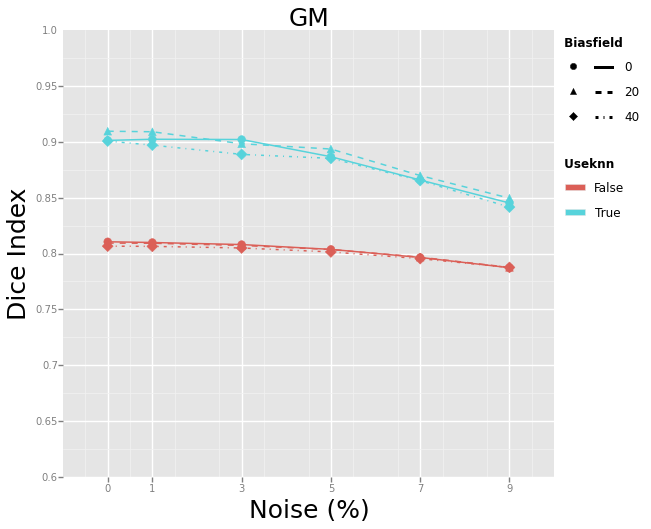

<ggplot: (286955677)>


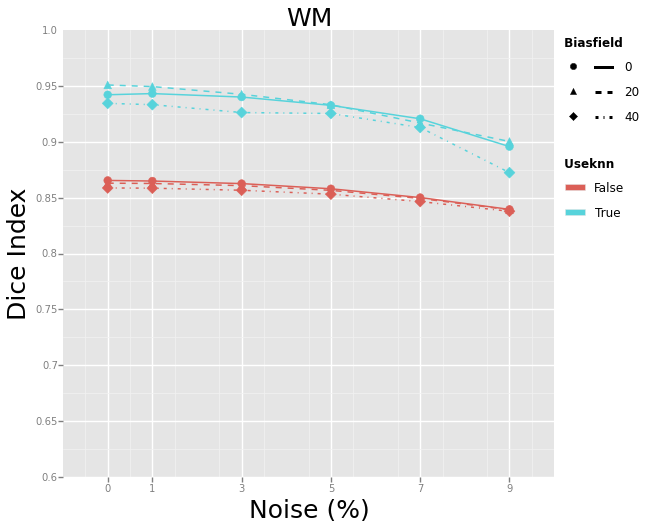

<ggplot: (285164469)>


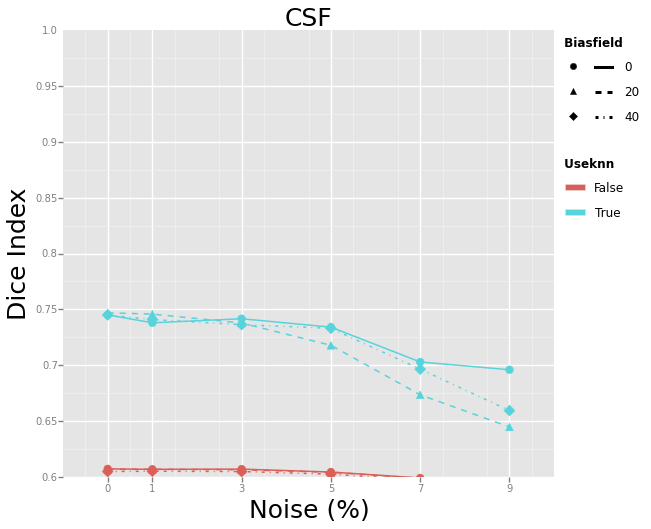

<ggplot: (284235837)>


In [7]:
#metric='hausdorffAvg'; label='Hausdorff Distance Avg.'
#ylim1=0.0; ylim2=2
metric='dice'; label='Dice Index'
ylim1=0.6; ylim2=1.00

df1 = DataFrame.loc[(DataFrame.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p1)

df2 = DataFrame.loc[(DataFrame.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p2)

df3 = DataFrame.loc[(DataFrame.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p3)

Results show that using KNN method, in addition to EM segmentation, improves the segmentation accuracy.
From now, in all future exeperiments, KNN is used for the classification.

#Second experiment
Before adding new modalities that may have different resolutions rather than the first input image, we enhance BRAINSABC so it performs classification is physical space by preserving the resolution of input image modalities.
In this experiment we evaluate and compare the performance of BRAINSABC when it is run based physical space or voxel space. We expect to get the same results from both methods. 

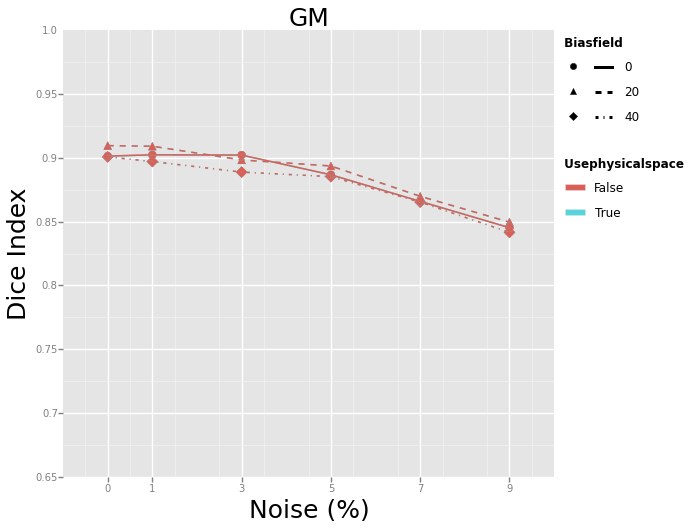

<ggplot: (284930749)>


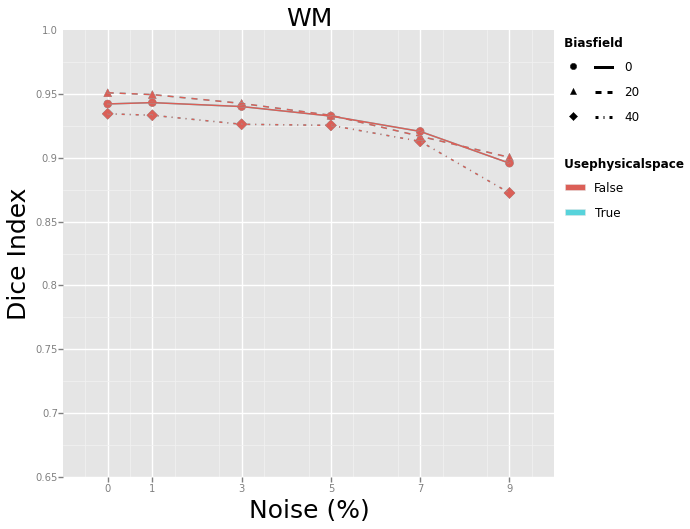

<ggplot: (285197521)>


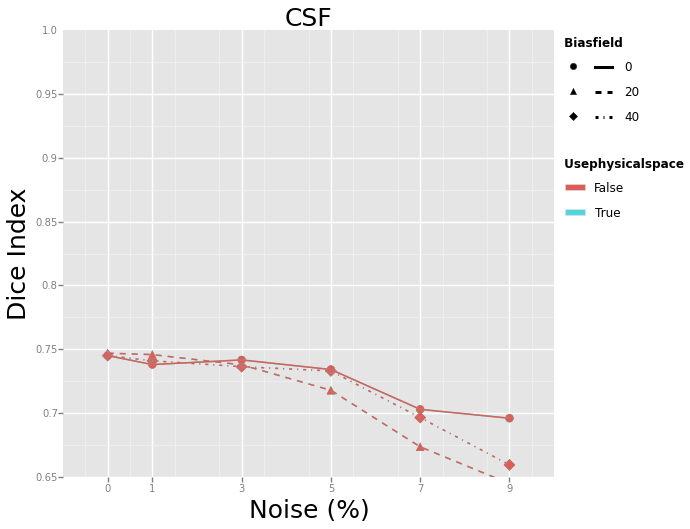

<ggplot: (285275101)>


In [8]:
metric='dice'; label='Dice Index'
ylim1=0.65; ylim2=1.00

df1 = DataFrame.loc[(DataFrame.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    #(DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    (DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='usePhysicalSpace', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p1)

df2 = DataFrame.loc[(DataFrame.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    #(DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    (DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='usePhysicalSpace', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p2)

df3 = DataFrame.loc[(DataFrame.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    #(DataFrame.usePhysicalSpace == False) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 0) & # if multimodality + resolution
                    (DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='usePhysicalSpace', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p3)

Above results show that BRAINSABC generates equivalent segmentation results in physical space.
From now on, in all future experiments, we run BRAINSABC in physical space.

# Third experiment
In this experiment, we show that how adding the second modality affects the segmentation results.
Three tests are run. All tests use both EM and KNN classification methods.
Red color shows the results when only one modality (T1) is used.
Green color shows the results when two modalities are used (T1 and T2), and both images have the same isotropic 1x1x1 resolution.
Blue color shows results when two modalities with different resolutions are used. T1 is 1x1x1, but T2 has the voxel sizes as 1x1x3.

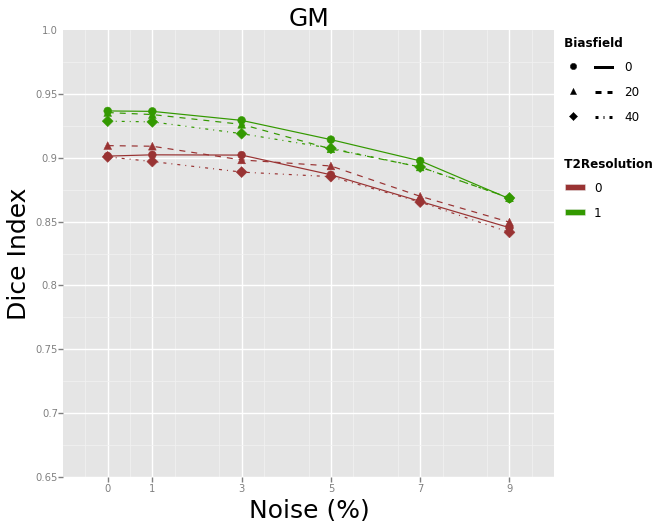

<ggplot: (284990261)>


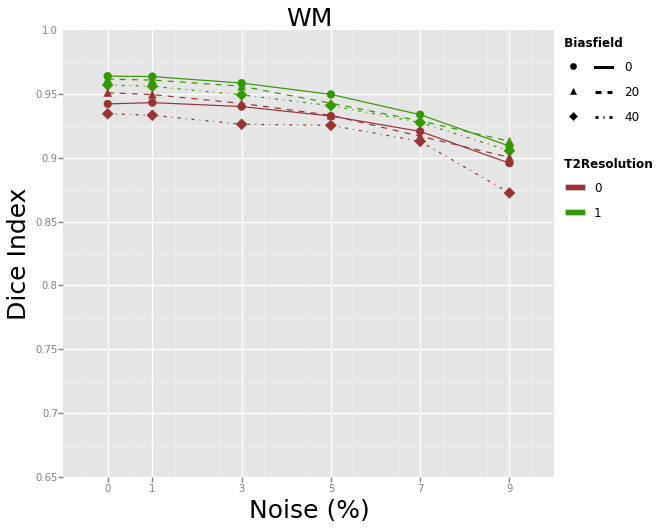

<ggplot: (284225461)>


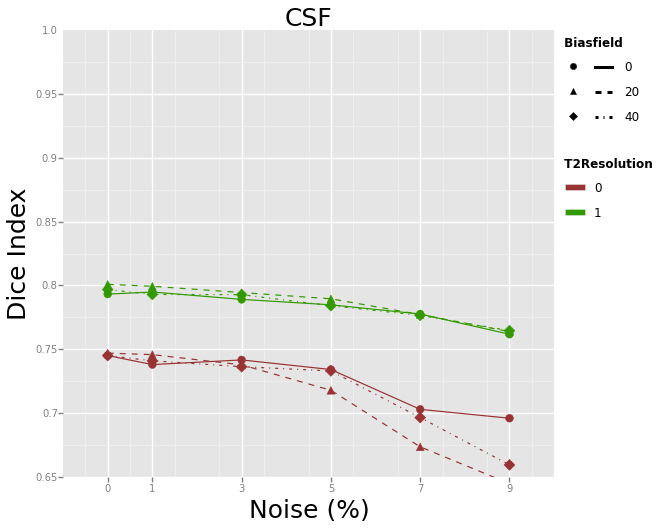

<ggplot: (284759477)>


In [9]:
#DataFrame1 = DataFrame_slice.loc[DataFrame_slice.t2resolution < 3]
DataFrame1 = DataFrame.loc[DataFrame.t2resolution < 3] # Note that here DataFrame is used as source
#DataFrame1 = DataFrame_slice
#DataFrame1 = DataFrame
#####
metric='dice'; label='Dice Index'
ylim1=0.65; ylim2=1.00
#####

df1 = DataFrame1.loc[(DataFrame1.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame1.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame1.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame1.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame1.useKnn == True) & # use knn or not
                    (DataFrame1.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.2) \
+ scale_color_manual(values=('#993333','#339900')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p1)

df2 = DataFrame1.loc[(DataFrame1.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame1.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame1.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame1.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame1.useKnn == True) & # use knn or not
                    (DataFrame1.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.2) \
+ scale_color_manual(values=('#993333','#339900')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p2)


df3 = DataFrame1.loc[(DataFrame1.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame1.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame1.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame1.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame1.useKnn == True) & # use knn or not
                    (DataFrame1.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.2) \
+ scale_color_manual(values=('#993333','#339900')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p3)


* For GM and WM: 
Green lines show that adding new second modality can enhance segmentation results in higher levels of noise if the new modality have the same resolution as the first modality. 
Blue lines show worse classification results when second modality is at different resolution. It is expected because of partial volume effect.

* For CSF:
Adding second modality has enhanced the segmentation result; however, more enhancements are achieved when the new modality has the same resolution as the first input image.

# Forth experiment
In forth experiment, we see the effect of adding second modalities with different resolutions

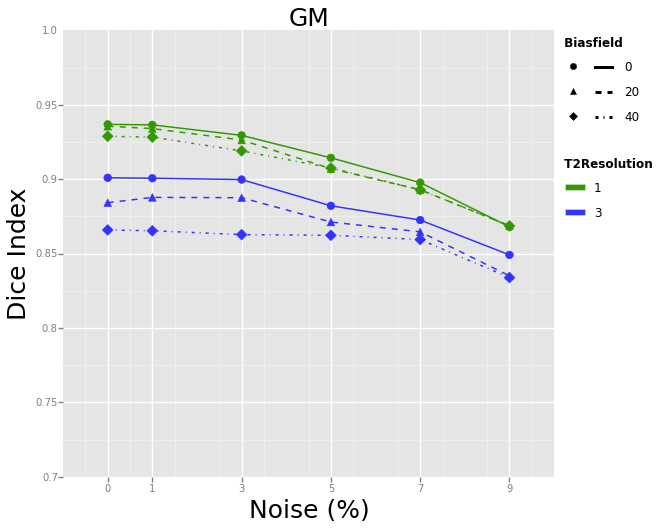

<ggplot: (284918913)>


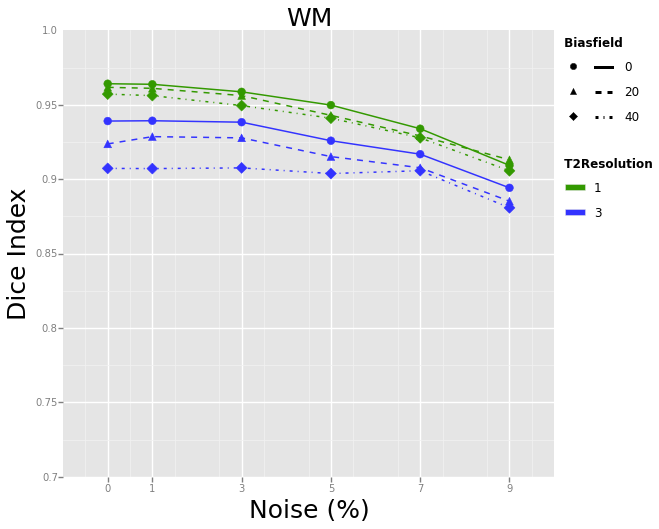

<ggplot: (285095205)>


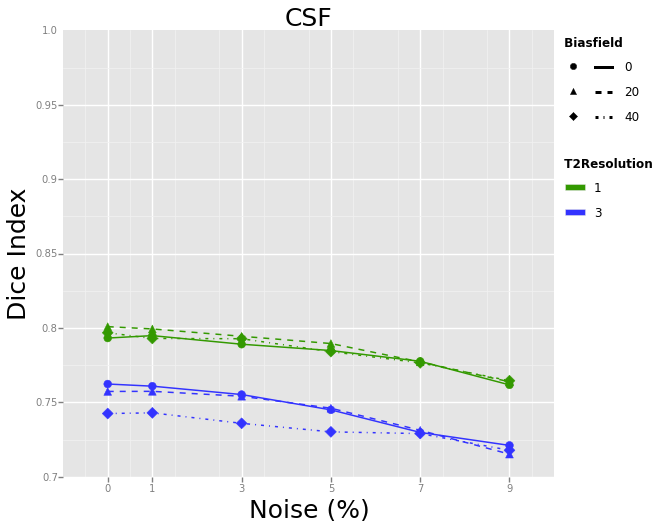

<ggplot: (284474913)>


In [10]:
DataFrame3 = DataFrame.loc[DataFrame.t2resolution > 0] # Compare 1x1x1 with 1x1x3
#DataFrame1 = DataFrame
#####
metric='dice'; label='Dice Index'
#metric='hausdorffAvg'; label='Hausdorff Avg Distance'
#####

df1 = DataFrame3.loc[(DataFrame3.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame3.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame3.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame3.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame3.useKnn == True) & # use knn or not
                    (DataFrame3.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(0.7, 1.00) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p1)

#--------------
df2 = DataFrame3.loc[(DataFrame3.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame3.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame3.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame3.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame3.useKnn == True) & # use knn or not
                    (DataFrame3.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(0.7, 1.00) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p2)

#--------------
df3 = DataFrame3.loc[(DataFrame3.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame3.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame3.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame3.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame3.useKnn == True) & # use knn or not
                    (DataFrame3.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='t2resolution', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(0.7, 1.00) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p3)

# Fifth experiment
Finally, we investigate how incorporating pure plugs mask can improve the segmentation when input modalities are in different resolutions.

In following tests, single modal and multi modal segmentations are run with and without using pure plugs mask.

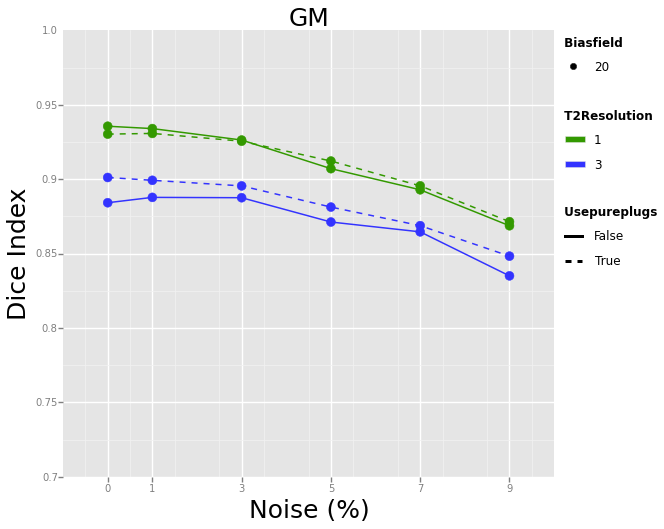

<ggplot: (284951557)>


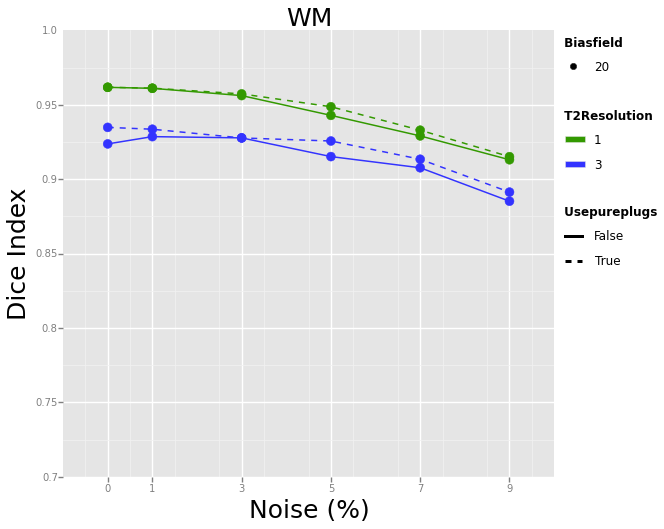

<ggplot: (284976477)>


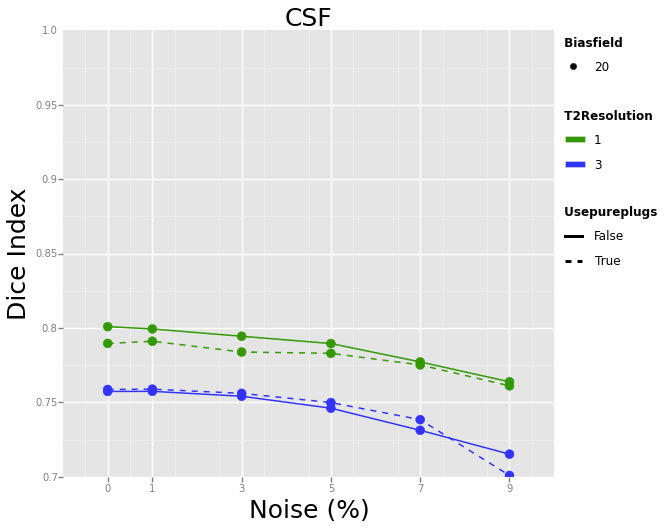

<ggplot: (287753941)>


In [14]:
DataFrame2 = DataFrame.loc[(DataFrame.t2resolution > 0)]
#DataFrame2 = DataFrame
#DataFrame2 = DataFrame_slice.loc[(DataFrame_slice.t2resolution > 0)]
#DataFrame2 = DataFrame_slice
#####
metric='dice';label='Dice Index'
ylim1=0.7;ylim2=1.00

#metric='hausdorffAvg';label='Hausdorff Avg Distance'
#ylim1=0.0;ylim2=0.5
#####

df1 = DataFrame2.loc[(DataFrame2.roi == 'GM') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p1)

df2 = DataFrame2.loc[(DataFrame2.roi == 'WM') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p2)


df3 = DataFrame2.loc[(DataFrame2.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),title=element_text(size=25))
print(p3)

* For GM and WM:
Results show that considering pure plugs in classification always enhances the results, such that multi-modal classification with low resolution T2 and using pure plug masks performs so close to the situation when high resolution T2 is added and pure plugs are not used.

* For CSF:
Adding pure plugs does not cause any meaningful changes to the results.